### Heart Disease Data Set

#### Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).



Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

In [203]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [204]:
#importing input file
df=pd.read_csv("heartdisease_data.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [205]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


Attribute information:
1. age: age in years
2. sex: sex (1 = male; 0 = female)

3.  cp: chest pain type
-- Value 1: typical angina
Angina pectoris or typical angina is the discomfort that is noted when the heart does not get enough blood or oxygen. Typically, this is caused by blockage or plaque buildup in the coronary arteries. If one or more of the coronary arteries is partially or completely clogged, the heart will not get enough oxygen

-- Value 2: atypical angina
If one or more of the coronary arteries is partially or completely clogged, the heart will not get enough oxygen. Usually, angina is a symptom that may feel like a tightness or heaviness in the central chest. ... Women may have more of a subtle presentation called atypical angina.

-- Value 3: non-anginal pain
Non-cardiac chest pain is often described as feeling like angina, the chest pain caused by heart disease. The patient feels a pressure or squeezing pain behind the breast bone. Some people also report the pain spreads to the neck, left arm, or back. The pain can last for a few minutes or for hours.

-- Value 4: asymptomatic
Asymptomatic means neither causing nor exhibiting symptoms of disease.

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
A normal reading would be any blood pressure below 120/80 mm Hg and above 90/60 mm Hg in an adult

5. chol: serum cholestoral in mg/dl
healthy serum cholesterol	less than 200 mg/dL

6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest
In a cardiac stress test, an ST depression of at least 1 mm after adenosine administration indicates a reversible ischaemia, while an exercise stress test requires an ST depression of at least 2 mm to significantly indicate reversible ischaemia.

11. slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
The normal ST segment during exercise therefore slopes sharply upwards. By convention, ST segment depression is measured relative to the isoelectric baseline (between the T and P waves) at a point 60-80 ms after the J point.

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [206]:
#Checking the shape of the dataset
df.shape

(200, 14)

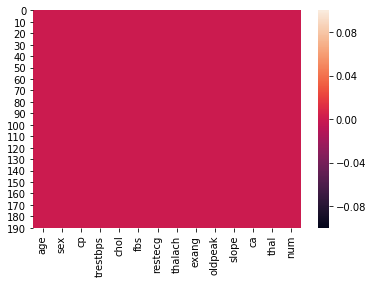

In [207]:
#Let's check if there are any missing values
sns.heatmap(df.isnull())

In [208]:
df.isnull().sum()
#There are no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [209]:
#Checking the datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null object
chol        200 non-null object
fbs         200 non-null object
restecg     200 non-null int64
thalach     200 non-null object
exang       200 non-null object
oldpeak     200 non-null object
slope       200 non-null object
ca          200 non-null object
thal        200 non-null object
num         200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [210]:
#Certain columns which have integers are showing object datatype. We need to check if there missing values represented by symbols.
# We can check the unique value counts and we will find if any such values
for i in df.columns:
    print("The unique value counts of", i, "are: ")
    print(df[i].value_counts())
    print("\n")

The unique value counts of age are: 
63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64


The unique value counts of sex are: 
1    194
0      6
Name: sex, dtype: int64


The unique value counts of cp are: 
4    131
3     47
2     14
1      8
Name: cp, dtype: int64


The unique value counts of trestbps are: 
?      56
120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
134     4
124     4
128     4
126     4
136     4
144     4
170     4
132     3
158     3
155     2
154     2
112     2
104     2
125     2
152     2
116     2
180     2
138     2
0       1
118     1
135     1
156     1
96      1
106     1
127     1
102     1
114     1
146   

Observations:-
1. Trestbps has 56 missing values represented by '?' out of 200
2. Chol has 7 missing values represented by '?' out of 200.
3. fbs has 7 missing values represented by '?' out of 200.
4. thalach has 53 missing values represented by '?' out of 200.
5. Exang has 53 missing values represented by '?' out of 200.
6. oldpeak has 56 missing values represented by '?' out of 200.
7. slope has 102 missing values represented by '?' out of 200. The other values are 1, 2 and 3.
8. ca has 198 missing values represented by '?' out of 200. The other value is 0.
9. thal has 166 missing values represented by '?' out of 200. The other values are 7,6 and 3.

From analysing above, we can come up with the below solution to handle the missing values:-
1. ca has only two values rest all is missing. So we need to delete the column.
2. thal has most of the values missing (166 out of 200). So we can delele that as well.
3. rest all the values can be handled by replacing it with mean, median or mode.

#### Handling the missing values

In [211]:
#Deleting relevant columns
df.drop(['ca','thal'],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [212]:
#replacing '?' values with relevant values
#manually replacing with most repeated values instead of mode in some columns as mode value is showing ? again and mean is not calculating as ? is in the column
df['slope']=df['slope'].replace('?','2') 
df['oldpeak']=df['oldpeak'].replace('?','0')
df['exang']=df['exang'].replace('?',df['exang'].mode()[0])
df['thalach']=df['thalach'].replace('?','120')
df['fbs']=df['fbs'].replace('?',df['fbs'].mode()[0])
df['chol']=df['chol'].replace('?',df['chol'].mode()[0])
df['trestbps']=df['trestbps'].replace('?','120')


In [213]:
df.dtypes
#There are few columns whose datatype should be numeric but it is object. We need to convert them to numeric datatype.

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
num          int64
dtype: object

#### Converting the object type dtypes to integer or float type as necessary

In [214]:

df['chol']=df['chol'].astype(int)
df['oldpeak']=df['oldpeak'].astype(float)
df['exang']=df['exang'].astype(int)
df['thalach']=df['thalach'].astype(int)
df['fbs']=df['fbs'].astype(int)
df['chol']=df['chol'].astype(int)
df['trestbps']=df['trestbps'].astype(int)
df['slope']=df['slope'].astype(int)

In [215]:
#rechecking the datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int32
chol          int32
fbs           int32
restecg       int64
thalach       int32
exang         int32
oldpeak     float64
slope         int32
num           int64
dtype: object

### Statistical Analysis

In [216]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,172.490000,0.340000,0.735000,122.055000,0.740000,0.951000,2.065000,1.520000
std,7.811697,0.171015,0.795701,19.280055,116.752497,0.474898,0.683455,18.876269,0.439735,1.110344,0.471046,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,120.000000,1.000000,0.500000,2.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


Observations
1. Most of the patients taken on record are of average age 59.
2. The sex of patients on record is male.
3. Chol column seems to have outliers. We need to check it.


#### Univariate Analysis

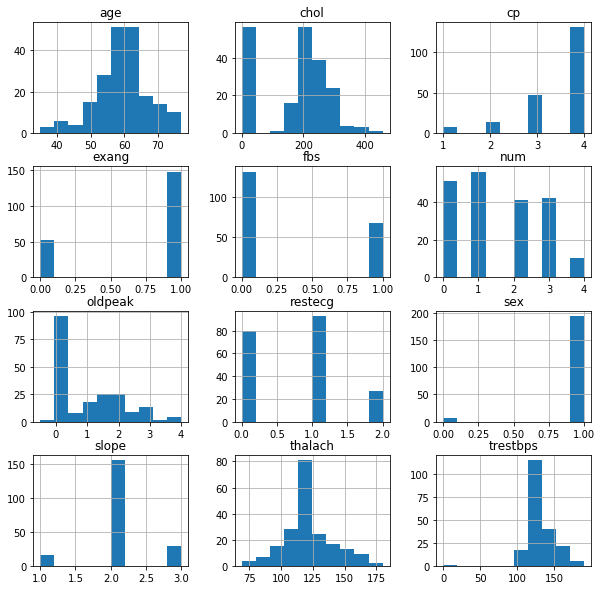

In [217]:
df.hist(figsize=(10,10))
plt.show()

In [218]:
#Few columns like age, thalach seems to be symmetric and other are not symmetric and needs to be treated later

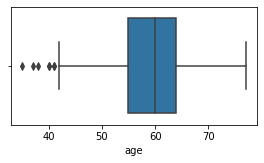

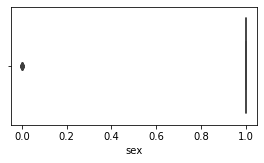

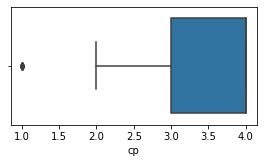

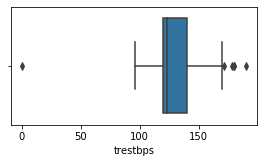

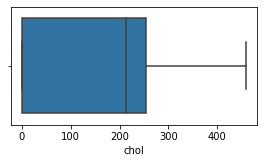

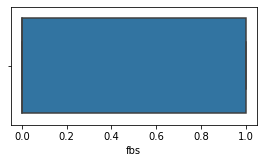

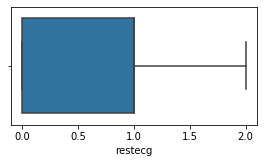

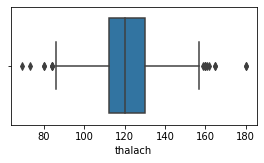

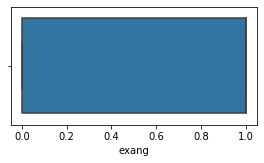

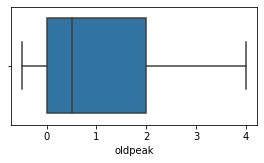

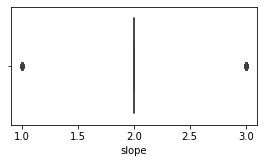

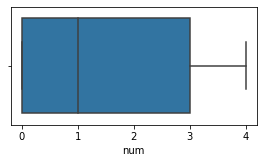

In [219]:
col_list=df.columns.values
for i in range(0,len(col_list)):
    if df[col_list[i]].dtypes!='O':
        plt.figure(figsize=(15,10))
        plt.subplot(4,3,2)
        sns.boxplot(df[col_list[i]])
        plt.show()

In [220]:
#only few columns have outliers which needs to be treated

### Bivariate Analysis

In [221]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [222]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,0.034230,-0.038280,0.167637,0.049923,0.135728,0.002400,-0.150146,0.129027,0.134659,0.107135,0.287289
sex,0.034230,1.000000,0.038036,-0.002347,-0.101693,-0.059400,0.060621,-0.004156,0.029402,0.058379,0.086709,0.147470
cp,-0.038280,0.038036,1.000000,0.139569,0.048981,-0.044416,0.034790,-0.108585,0.089904,0.186268,0.059460,0.168210
trestbps,0.167637,-0.002347,0.139569,1.000000,0.126037,0.159776,0.077503,0.014484,0.084356,0.250914,0.099138,0.149265
chol,0.049923,-0.101693,0.048981,0.126037,1.000000,0.156311,0.002391,-0.058601,0.115446,-0.060076,0.049033,0.058451
fbs,0.135728,-0.059400,-0.044416,0.159776,0.156311,1.000000,0.170616,0.033219,-0.176144,-0.138832,-0.009435,0.048940
restecg,0.002400,0.060621,0.034790,0.077503,0.002391,0.170616,1.000000,0.010094,-0.063203,-0.115200,-0.039881,-0.032800
thalach,-0.150146,-0.004156,-0.108585,0.014484,-0.058601,0.033219,0.010094,1.000000,-0.093316,0.140268,-0.101567,-0.073072
exang,0.129027,0.029402,0.089904,0.084356,0.115446,-0.176144,-0.063203,-0.093316,1.000000,0.073608,0.106259,0.206541
oldpeak,0.134659,0.058379,0.186268,0.250914,-0.060076,-0.138832,-0.115200,0.140268,0.073608,1.000000,0.293395,0.383736


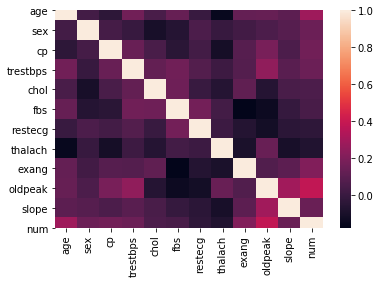

In [223]:
sns.heatmap(df.corr())

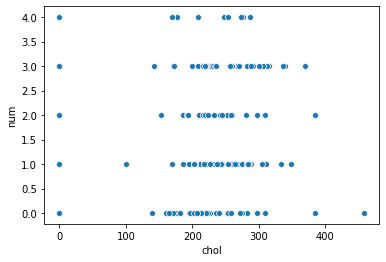

In [224]:
sns.scatterplot(x='chol',y='num',data=df)

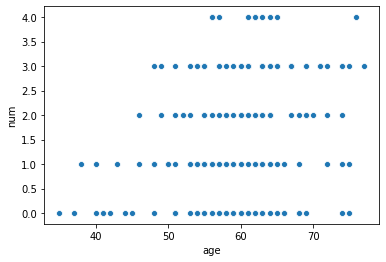

In [225]:
sns.scatterplot(x='age',y='num',data=df)

Observations
1. We can observe that the highest range of narrowing (4) is happening for age group above 60.
2. Around 40 age group the narrowing range is from 0 to 3.
3. Above 70 more are in the range 3.


In [226]:
df.groupby('num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
num,,,,,,,,,,,
0,56.823529,0.941176,3.156863,126.215686,171.647059,0.274510,0.803922,123.098039,0.607843,0.437255,2.000000
1,57.571429,0.946429,3.642857,128.607143,169.410714,0.392857,0.714286,123.017857,0.732143,0.764286,2.017857
2,61.048780,1.000000,3.682927,133.268293,147.780488,0.317073,0.731707,122.878049,0.756098,1.221951,2.146341
3,62.452381,1.000000,3.523810,129.880952,197.714286,0.357143,0.619048,119.500000,0.857143,1.202381,2.023810
4,62.200000,1.000000,3.700000,142.400000,189.400000,0.400000,1.000000,118.700000,0.900000,2.450000,2.500000


Observations:
1. The least risky range of 0 and 1 are amongst the mean age of 56 and 57. So as age progresses risk is more.
2. As cp value increases, the num range also increases.
3. Num range 3 and 4 have highest choloestrol range of 197 and 189 respectively.
4. Num range of 4 has highest mean fbs of 0.40
5. Num range of 4 has highest slope, oldpeak, exang and restecg.
6. Num range of 4 has least thalach (maximum heart rate achieved)

### Preprocessing of Data

In [227]:
#### removing the outliers
from scipy.stats import zscore
print("The shape before removing outliers is", df.shape)
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("The shape before removing outliers is", df.shape)

The shape before removing outliers is (200, 12)
The shape before removing outliers is (181, 12)


#### Scaling the Data

In [228]:
#separating the input and target variables before using the scaler
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
print(x.shape)
print(y.shape)
x.head()

(181, 11)
(181, 1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,4,140,260,0,1,112,1,3.0,2
1,44,1,4,130,209,0,1,127,0,0.0,2
2,60,1,4,132,218,0,1,140,1,1.5,3
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,2


In [229]:
y.head()

,num
0,2
1,0
2,2
3,1
4,0


In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.650,0.0,1.0,0.523810,0.567686,0.0,0.5,0.447917,1.0,0.777778,0.5
1,0.175,0.0,1.0,0.404762,0.456332,0.0,0.5,0.604167,0.0,0.111111,0.5
2,0.575,0.0,1.0,0.428571,0.475983,0.0,0.5,0.739583,1.0,0.444444,1.0
3,0.450,0.0,1.0,0.547619,0.497817,0.0,0.5,0.833333,1.0,0.666667,0.0
4,0.725,0.0,0.5,0.166667,0.465066,1.0,1.0,0.312500,1.0,0.400000,0.5


In [231]:
#Since the problem is classification type, we need to implement classification algorithms for the same. 


#### selecting best random_state for splitting the data

In [244]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def max_accuracy(reg,x,y):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score achieved at r state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy", max_acc_score, "is achieved at random state", final_r_state)
    return max_acc_score

In [233]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
max_accuracy(mb,x,y)

The accuracy score achieved at r state 42 is 0.24324324324324326
The accuracy score achieved at r state 43 is 0.32432432432432434
The accuracy score achieved at r state 44 is 0.32432432432432434
The accuracy score achieved at r state 45 is 0.35135135135135137
The accuracy score achieved at r state 46 is 0.2972972972972973
The accuracy score achieved at r state 47 is 0.4864864864864865
The accuracy score achieved at r state 48 is 0.16216216216216217
The accuracy score achieved at r state 49 is 0.21621621621621623
The accuracy score achieved at r state 50 is 0.24324324324324326
The accuracy score achieved at r state 51 is 0.32432432432432434
The accuracy score achieved at r state 52 is 0.35135135135135137
The accuracy score achieved at r state 53 is 0.1891891891891892
The accuracy score achieved at r state 54 is 0.2702702702702703
The accuracy score achieved at r state 55 is 0.21621621621621623
The accuracy score achieved at r state 56 is 0.24324324324324326
The accuracy score achieved a

0.4864864864864865

In [235]:
#splitting the test and training data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=47,test_size=0.20)

In [237]:
#Checking the best parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
parameters={'alpha':(0,0.001,0.01,0.1,1)}
gdmb=GridSearchCV(mb,parameters)
gdmb.fit(train_x,train_y)
gdmb.best_params_

{'alpha': 0}

In [238]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [240]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [241]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [242]:
#After obtaining best parameters, we should now check the models

In [245]:
score=[]
cv=[]

algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'), SVC(C=10, kernel='rbf'),MultinomialNB(alpha=0)]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The accuracy score is  0.43243243243243246

The cross val score is 0.3266602624497361

              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.45      0.38      0.42        13
           2       0.29      0.25      0.27         8
           3       0.50      0.40      0.44         5
           4       0.00      0.00      0.00         2

    accuracy                           0.43        37
   macro avg       0.35      0.36      0.35        37
weighted avg       0.41      0.43      0.41        37


[[7 1 1 0 0]
 [4 5 2 1 1]
 [3 3 2 0 0]
 [0 2 1 2 0]
 [0 0 1 1 0]]

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min

In [246]:
result=pd.DataFrame({'Model':[KNeighborsClassifier, DecisionTreeClassifier, SVC,MultinomialNB],'Accuracy_Score':score,'Cross_val_score':cv})
result

,Model,Accuracy_Score,Cross_val_score
0,<class 'sklearn.neighbors.classification.KNeig...,0.432432,0.326660
1,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.243243,0.313253
2,<class 'sklearn.svm.classes.SVC'>,0.432432,0.358245
3,<class 'sklearn.naive_bayes.MultinomialNB'>,0.486486,0.315584


Since the models are giving low Accuracy score we need to use ensemble techniques to boost the score

In [247]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 50}

In [248]:
#checking the best accuracy score and random state for RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
max_accuracy(rf,x,y)

The accuracy score achieved at r state 42 is 0.2702702702702703
The accuracy score achieved at r state 43 is 0.2702702702702703
The accuracy score achieved at r state 44 is 0.35135135135135137
The accuracy score achieved at r state 45 is 0.2702702702702703
The accuracy score achieved at r state 46 is 0.32432432432432434
The accuracy score achieved at r state 47 is 0.2972972972972973
The accuracy score achieved at r state 48 is 0.35135135135135137
The accuracy score achieved at r state 49 is 0.21621621621621623
The accuracy score achieved at r state 50 is 0.32432432432432434
The accuracy score achieved at r state 51 is 0.24324324324324326
The accuracy score achieved at r state 52 is 0.32432432432432434
The accuracy score achieved at r state 53 is 0.2702702702702703
The accuracy score achieved at r state 54 is 0.2972972972972973
The accuracy score achieved at r state 55 is 0.2702702702702703
The accuracy score achieved at r state 56 is 0.24324324324324326
The accuracy score achieved at r

0.43243243243243246

In [257]:
#checking the cross val score
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.34778026146447194


In [252]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'criterion': 'mae', 'learning_rate': 0.1, 'n_estimators': 200}

In [253]:
#checking the best accuracy score and random state for RandomForestClassifier
gc=GradientBoostingClassifier(criterion='mae', learning_rate= 0.1, n_estimators= 200)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 42 is 0.3783783783783784
The accuracy score achieved at r state 43 is 0.21621621621621623
The accuracy score achieved at r state 44 is 0.2972972972972973
The accuracy score achieved at r state 45 is 0.21621621621621623
The accuracy score achieved at r state 46 is 0.2702702702702703
The accuracy score achieved at r state 47 is 0.2972972972972973
The accuracy score achieved at r state 48 is 0.21621621621621623
The accuracy score achieved at r state 49 is 0.2702702702702703
The accuracy score achieved at r state 50 is 0.3783783783783784
The accuracy score achieved at r state 51 is 0.32432432432432434
The accuracy score achieved at r state 52 is 0.40540540540540543
The accuracy score achieved at r state 53 is 0.24324324324324326
The accuracy score achieved at r state 54 is 0.13513513513513514
The accuracy score achieved at r state 55 is 0.21621621621621623
The accuracy score achieved at r state 56 is 0.2702702702702703
The accuracy score achieved at r

0.43243243243243246

In [261]:
#checking the cross val score
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.26118317907791594


In [255]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 100}

In [258]:
#checking the best accuracy score and random state for AdaBoostClassifier
gc=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 100)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 42 is 0.21621621621621623
The accuracy score achieved at r state 43 is 0.21621621621621623
The accuracy score achieved at r state 44 is 0.3783783783783784
The accuracy score achieved at r state 45 is 0.2972972972972973
The accuracy score achieved at r state 46 is 0.24324324324324326
The accuracy score achieved at r state 47 is 0.24324324324324326
The accuracy score achieved at r state 48 is 0.40540540540540543
The accuracy score achieved at r state 49 is 0.2702702702702703
The accuracy score achieved at r state 50 is 0.2702702702702703
The accuracy score achieved at r state 51 is 0.3783783783783784
The accuracy score achieved at r state 52 is 0.35135135135135137
The accuracy score achieved at r state 53 is 0.21621621621621623
The accuracy score achieved at r state 54 is 0.2972972972972973
The accuracy score achieved at r state 55 is 0.24324324324324326
The accuracy score achieved at r state 56 is 0.2702702702702703
The accuracy score achieved at r

0.40540540540540543

In [260]:
#checking the cross val score
cs=cross_val_score(ad,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.29937866779972044


In [263]:
result2=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'R2 Score':[0.432,0.432,0.405],'Cross_val_score':[0.347,0.261,0.30]})
result2

,Boosters,R2 Score,Cross_val_score
0,RandomForestClassifier,0.432,0.347
1,GradientBoostClassifier,0.432,0.261
2,AdaBoostRegressor,0.405,0.300


In [264]:
result

,Model,Accuracy_Score,Cross_val_score
0,<class 'sklearn.neighbors.classification.KNeig...,0.432432,0.326660
1,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.243243,0.313253
2,<class 'sklearn.svm.classes.SVC'>,0.432432,0.358245
3,<class 'sklearn.naive_bayes.MultinomialNB'>,0.486486,0.315584


In [265]:
#The classification models or emsemble models are not giving good scores. The problem might be with the dataset.
#amongst the models, MultinomialNB performs better so let us finalise the same.

In [271]:
mb=MultinomialNB(alpha=0)
mb.fit(train_x,train_y)
pred=mb.predict(test_x)
ascore=accuracy_score(test_y,pred)
print("The accuracy score is", ascore)
cs=cross_val_score(mb,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score is", cs)

The accuracy score is 0.4864864864864865
The cross val score is 0.3155835534782903


In [272]:
#saving the model
from sklearn.externals import joblib
joblib.dump(mb,"Heart_disease.pkl")

['Heart_disease.pkl']